# Setup Environment

In [4]:
# gym library for super mario bros 
!pip install gym_super_mario_bros==7.4.0

In [5]:
# NES-emulator and provides OpenAI-Gym interface
!pip install nes_py

In [1]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# actions possible in 
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [3]:
# create environment for playing super mario
# (render_mode='human' forces env.render() to render env in human readable format)
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# map action_space of env to only 7 possible movements
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [4]:
# returns observation of type Box with {low, high, n-dim tuple, dtype}
env.observation_space.shape

(240, 256, 3)

In [5]:
env.action_space

Discrete(7)

In [6]:
# dummy run for 1000 steps
terminated = True
for _ in range(1000):
    if terminated:
        observation = env.reset()
    observation, reward, terminated, info = env.step(env.action_space.sample())
    env.render()
    
env.close()

C:\Users\shubh\AppData\Roaming\Python\Python310\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


# Preprocessing environment

In [11]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
import matplotlib.pyplot as plt

In [24]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# map action_space of env to only 7 possible movements
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [25]:
env = GrayScaleObservation(env, keep_dim=True)
# vectorize environment 
env = DummyVecEnv([lambda: env])
# takes vectorized env and stacks 4 image observations on last dimension of image
env = VecFrameStack(env, 4, channels_order='last')

In [26]:
env.observation_space.shape

(240, 256, 4)

In [29]:
observation = env.reset()
#observation, reward, terminated, info = env.step(env.action_space.sample())

In [30]:
observation.shape

(1, 240, 256, 4)

In [36]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [46]:
observation, reward, terminated, info = env.step([2])

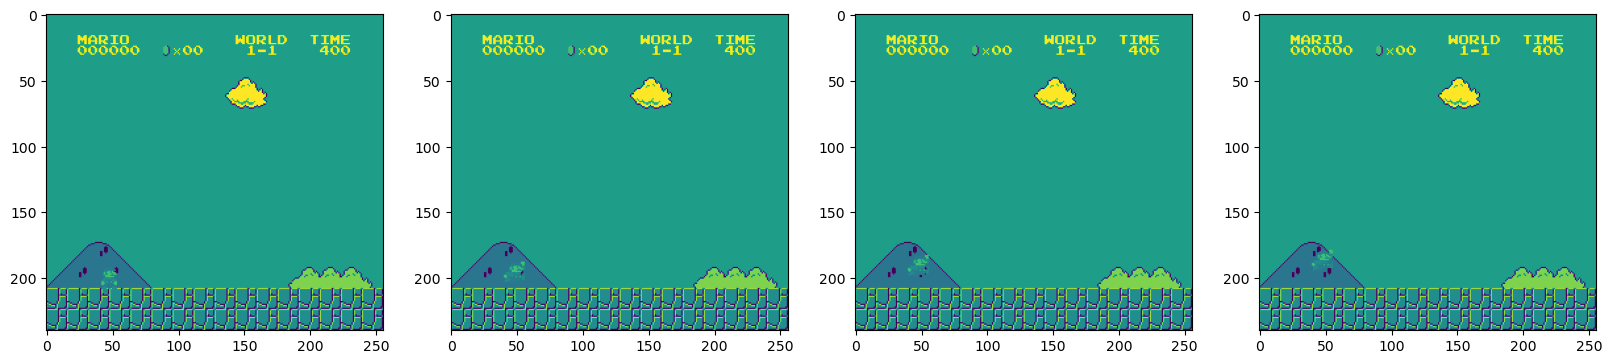

In [49]:
# frame stacking
plt.figure(figsize=(20,12))
for i in range(observation.shape[3]):
    plt.subplot(1,observation.shape[3],i+1)
    plt.imshow(observation[0][:,:,i])
    